# Fourier Transforms of Functions
This is a Jupyter notebook to investigate the Fourier transformations of functions such as a square wave or pulse, as well as more complex data such as an audio sample.

First, we import the modules we need:

In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Simple functions: square waves and pulses
First, we want to Fourier transform a square wave and a square pulse. We can use scipy to generate the square wave, then use the fast Fourier transform (FFT) function of numpy to do the analysis.

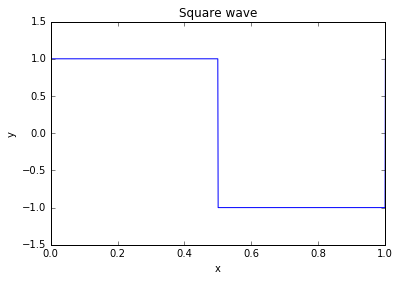

In [18]:
x = np.linspace(0,1,1000)
y = signal.square(2*np.pi*x) # generates a square wave

plt.ylim(-1.5,1.5)
plt.plot(x,y, label='Square wave')
plt.title("Square wave")
plt.xlabel('x')
plt.ylabel('y');

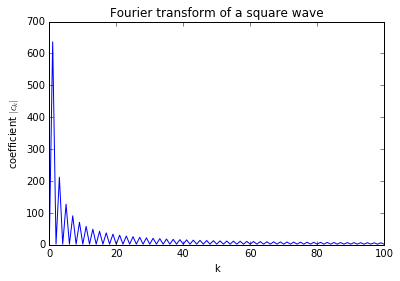

In [19]:
c_fft = np.fft.rfft(y) # apply the Fourier transform to the wave

plt.plot(abs(c_fft)) # plot the Fourier transform

plt.title('Fourier transform of a square wave')
plt.xlabel('k')
plt.xlim(0,100)
plt.ylabel('coefficient $|c_k|$');

As we can see here, the frequency of 1Hz has the highest coefficient, and other coefficients decay, but the square wave is only ever the sum of odd frequencies, as expected. We can also apply this method to a pulse.

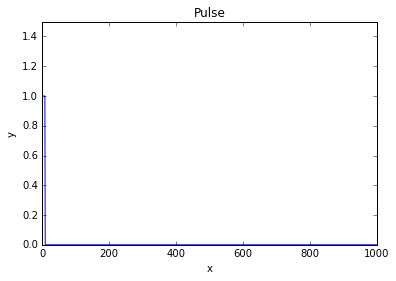

In [4]:
x = np.linspace(0,1000,1000)
y = np.zeros(1000)
y[:9] = [1]*9
plt.ylim(0,1.5)

plt.plot(x,y, label='Square wave')
plt.title("Pulse")
plt.xlabel('x')
plt.ylabel('y');

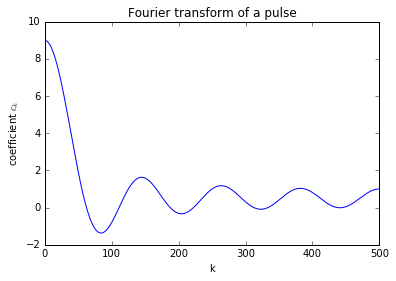

In [5]:
c_fft = np.fft.rfft(y) # apply the Fourier transform to the wave

plt.plot(c_fft.real) # plot the Fourier transform
plt.title('Fourier transform of a pulse')
plt.xlabel('k')
plt.ylabel('coefficient $c_k$');

This is the expected result for a box function, such as the pulse used here.

# Analysing audio samples
Now we want to analyse samples of audio played by two musical instruments, a piano and a trumpet. A piano generates sounds by hitting strings and making them vibrate, while a trumpet generates sounds through vibration of the air column inside the instrument.

To analyse the data, let's plot it on a graph and see how the amplitude changes over time. We do this in two ways: first, by plotting the first 2000 points, then by plotting every 500th point.

In [6]:
piano = np.loadtxt("piano.txt",float)
trumpet = np.loadtxt("trumpet.txt",float)

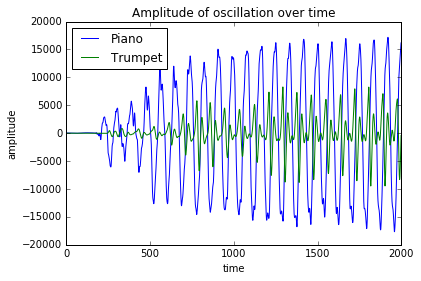

In [7]:
plt.plot(piano[:2000], label="Piano")
plt.plot(trumpet[:2000], label="Trumpet")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.title("Amplitude of oscillation over time")
plt.legend(loc=0)

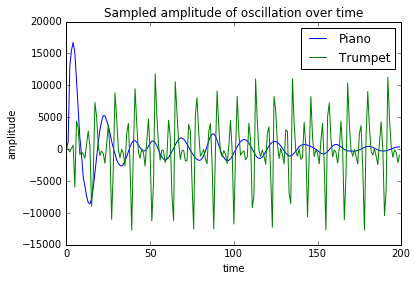

In [8]:
plt.plot(piano[::500], label="Piano")
plt.plot(trumpet[::500], label="Trumpet")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.title("Sampled amplitude of oscillation over time")
plt.legend(loc=0)

Now, we apply the Fast Fourier Transform to these data to determine which frequencies make up the signal.

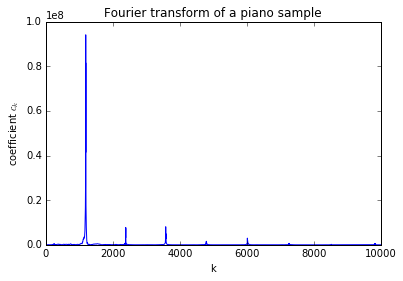

In [9]:
piano_fft = np.fft.rfft(piano) # apply the Fourier transform to the wave

plt.plot(abs(piano_fft)) # plot the Fourier transform
plt.xlim(0,10000)
plt.title('Fourier transform of a piano sample')
plt.xlabel('k')
plt.ylabel('coefficient $c_k$');

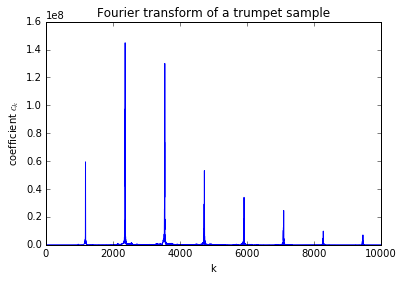

In [10]:
trumpet_fft = np.fft.rfft(trumpet) # apply the Fourier transform to the wave

plt.plot(abs(trumpet_fft)) # plot the Fourier transform
plt.xlim(0,10000)
plt.title('Fourier transform of a trumpet sample')
plt.xlabel('k')
plt.ylabel('coefficient $c_k$');

Looking at the first plot, of amplitude over time, this is the result we would expect: the piano has a "cleaner" sound, which is more periodic, while the trumpet has additional frequencies of oscillation (as demonstrated in the Fourier transform).

Now let's figure out determine the fundamental frequency, which is the first harmonic generated by the Fourier transform. It is related to the coefficient of the transform by $ f = \frac{\nu k}{N}, $, where $\nu$ is the sampling rate and $N$ the total number of sampled data points. We'll do this the old fashioned way: by taking narrower and narrower data samples until we have our result.

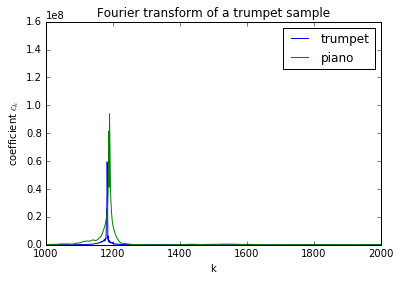

In [11]:
plt.plot(abs(trumpet_fft), label="trumpet")
plt.plot(abs(piano_fft), label="piano")
plt.xlim(1000,2000)
plt.title('Fourier transform of a trumpet sample')
plt.legend(loc=0)
plt.xlabel('k')
plt.ylabel('coefficient $c_k$');

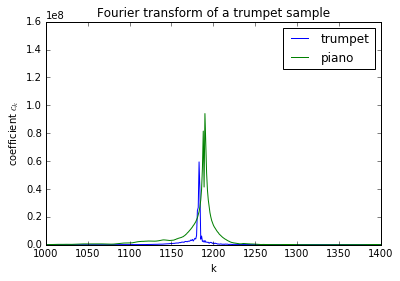

In [12]:
plt.plot(abs(trumpet_fft), label="trumpet")
plt.plot(abs(piano_fft), label="piano")
plt.xlim(1000,1400)
plt.title('Fourier transform of a trumpet sample')
plt.legend(loc=0)
plt.xlabel('k')
plt.ylabel('coefficient $c_k$');

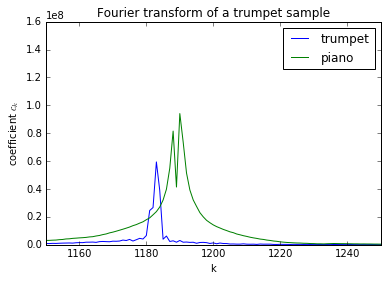

In [13]:
plt.plot(abs(trumpet_fft), label="trumpet")
plt.plot(abs(piano_fft), label="piano")
plt.xlim(1150,1250)
plt.title('Fourier transform of a trumpet sample')
plt.legend(loc=0)
plt.xlabel('k')
plt.ylabel('coefficient $c_k$');

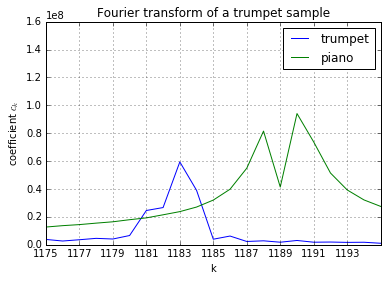

In [14]:
plt.plot(abs(trumpet_fft), label="trumpet")
plt.plot(abs(piano_fft), label="piano")

plt.title('Fourier transform of a trumpet sample')
plt.legend(loc=0)
plt.grid() # shows gridlines
plt.xlabel('k')
plt.ylabel('coefficient $c_k$')
plt.xticks(np.arange(1175,1195,2))
plt.xlim(1175,1195);

The coefficients of the fundamental frequencies are therefore the values at 1183 (for the trumpet) and 1190 (for the piano). We use those to calculate the frequency of vibration:

In [15]:
v = 44100
N = len(piano)
print(N)
f_piano = v*abs(1190)/N
f_trumpet = v*abs(1183)/N

print("The fundamental frequency for the piano is {:3.1f}Hz, while the fundamental frequency for the trumpet is {:3.1f}Hz.".format(f_piano, f_trumpet))

100000
The fundamental frequency for the piano is 524.8Hz, while the fundamental frequency for the trumpet is 521.7Hz.


These correspond to $C_5$ played by the piano and $C_5$ played by the trumpet - they're both slightly out of tune with each other though! In practise,this would lead to beats:

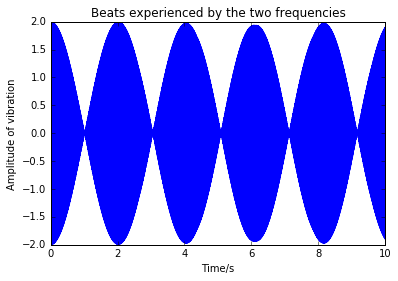

In [16]:
t = np.linspace(0,10,10000)
plt.plot(np.linspace(0,10,10000),np.cos(f_piano*t)+np.cos(f_trumpet*t), '-')
plt.xlabel("Time/s")
plt.ylabel("Amplitude of vibration")
plt.title("Beats experienced by the two frequencies")